Machine Learning

In [12]:
from google.colab import drive
import pandas as pd
import os
from io import StringIO
# Monter Google Drive
drive.mount('/content/drive', force_remount= True) #force_remount = True permet d'avoir un fichier mis à jour si modifs sur google drive

file_path = '/content/drive/My Drive/Datascientest/Projet_accidents/Dataset/2019_2023/df_total_final.csv'
df = pd.read_csv(file_path)
df.head(10)
df.info()
df.gravité_accident.value_counts()

Mounted at /content/drive


<ipython-input-12-21e3c8667d5e>:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273226 entries, 0 to 273225
Data columns (total 60 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Num_Acc                             273226 non-null  int64 
 1   jour                                273226 non-null  int64 
 2   mois                                273226 non-null  int64 
 3   an                                  273226 non-null  int64 
 4   hrmn                                273226 non-null  object
 5   dep                                 273226 non-null  object
 6   agg                                 273226 non-null  int64 
 7   int                                 273226 non-null  int64 
 8   atm                                 273226 non-null  int64 
 9   col                                 273226 non-null  int64 
 10  lat                                 273226 non-null  object
 11  long                                273

,count
gravité_accident,
2,175525
3,82229
4,15472


In [13]:
df['date']= pd.to_datetime(df['jour'].astype('str')+'/'+df['mois'].astype('str')+'/'+df['an'].astype('str')+ '/'+df['hrmn'].astype('str'), dayfirst = True)

In [14]:
df['heure'] = df['date'].dt.hour

Modification du type de la variable gravité_accident (cible), en variable catégorielle

In [15]:
df['gravité_accident']= df['gravité_accident'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273226 entries, 0 to 273225
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Num_Acc                             273226 non-null  int64         
 1   jour                                273226 non-null  int64         
 2   mois                                273226 non-null  int64         
 3   an                                  273226 non-null  int64         
 4   hrmn                                273226 non-null  object        
 5   dep                                 273226 non-null  object        
 6   agg                                 273226 non-null  int64         
 7   int                                 273226 non-null  int64         
 8   atm                                 273226 non-null  int64         
 9   col                                 273226 non-null  int64         
 10  lat     

Nettoyage colonne nbv

In [16]:
mode_value = df['nbv'].mode()[0]

# Remplacement des valeurs spécifiques
df['nbv']= df['nbv'].replace([-1, 11,12, '-1', ' -1', 0], mode_value)
df['nbv'] = df['nbv'].replace(['#VALEURMULTI', '-1', '0', '#ERREUR', '11', '12'], mode_value)
df['nbv'] = df['nbv'].replace({'2': 2, '8': 8, '6': 6, '4': 4, '5': 5, '7': 7, '3':3, '1':1, '10':10, '9':9})
df.nbv.value_counts()

<ipython-input-16-46f021ac723a>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['nbv'] = df['nbv'].replace({'2': 2, '8': 8, '6': 6, '4': 4, '5': 5, '7': 7, '3':3, '1':1, '10':10, '9':9})


,count
nbv,
2,178149
4,31627
1,27445
3,21215
6,6864
5,4219
8,2125
7,755
10,510


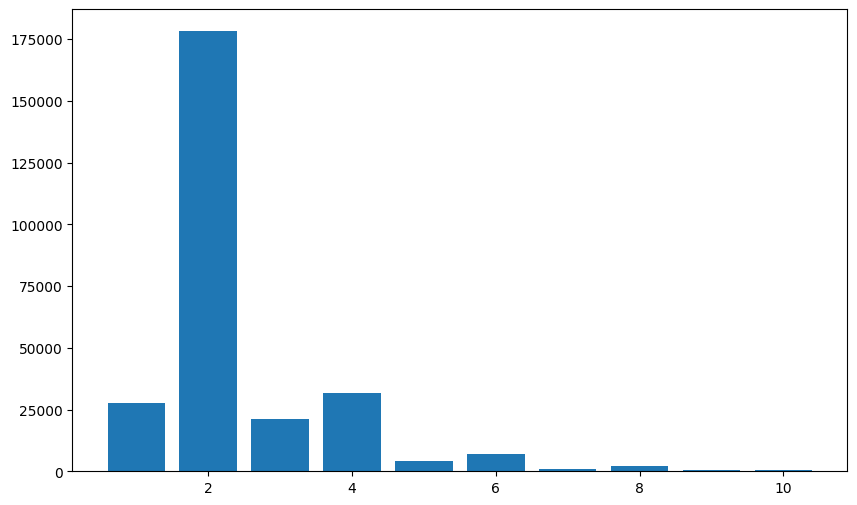

In [17]:
import matplotlib.pyplot as plt
nbv_counts = df.nbv.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(nbv_counts.index, nbv_counts.values)
plt.show();

Nettoyage colonne atm

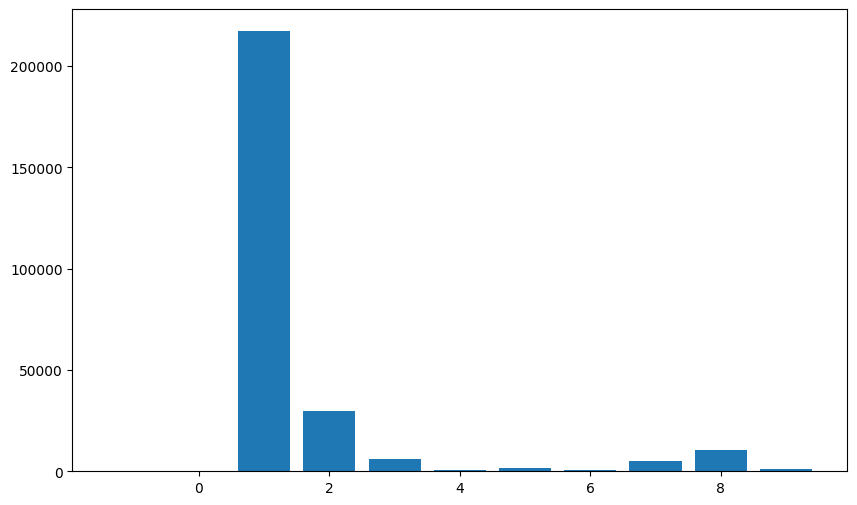

In [18]:
df.atm.value_counts()
import matplotlib.pyplot as plt
atm_counts = df.atm.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(atm_counts.index, atm_counts.values)
plt.show();

In [19]:
def regrouper(val):
    if val in [1]:
        return 'temps_normal'
    elif val in [2, 3]:
        return 'Temps_pluvieux'
    elif val in [8]:
        return 'Temps_couvert'
    else:
        return 'Autre'

df['atm'] = df['atm'].apply(regrouper)
df.atm.value_counts()

,count
atm,
temps_normal,217143
Temps_pluvieux,36030
Temps_couvert,10470
Autre,9583


Random Forest et affichage des features importances

In [20]:
# Enregristrement du df pour le machine learning
df.to_csv('/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_machine_learning.csv', index=False)